# 2). Explore the Data

#### Imports

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer

# pip install wordcloud
from wordcloud import WordCloud

> I will begin by examing the most frequently used words, bigrams, and trigrams in each of the r/AskMen and r/AskWomen datasets.

#### EDA for r/AskMen

In [2]:
askmen = pd.read_csv('./data/askmen.csv')

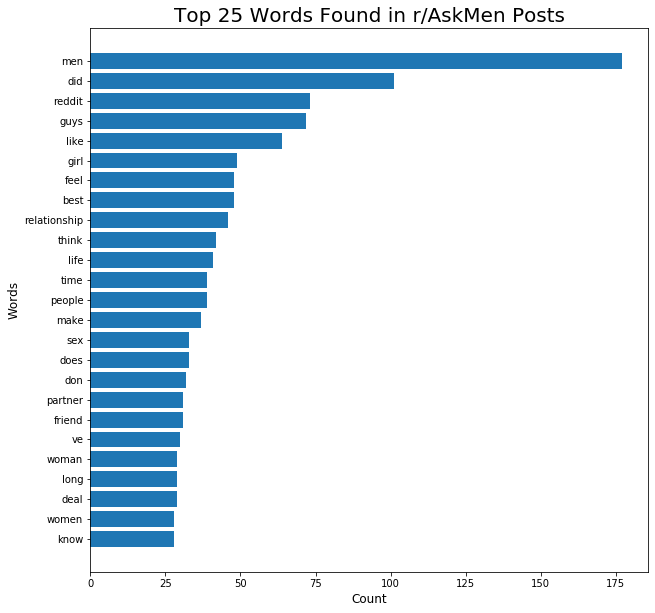

In [3]:
# most frequent words
cvec = CountVectorizer(stop_words = 'english')
X = askmen['title']
X = cvec.fit_transform(X)
Xcvec_df = pd.DataFrame(X.toarray(),
                    columns = cvec.get_feature_names())

top_words = {}

# loop through columns
for i in Xcvec_df.columns:
    # save sum of each column in dictionary
    top_words[i] = Xcvec_df[i].sum()
    
# top_words to dataframe sorted by highest occurance
most_freq_words_men = pd.DataFrame(sorted(top_words.items(), key = lambda x: x[1]))

plt.figure(figsize = (10, 10))

plt.barh(most_freq_words_men[0][-25:],
        most_freq_words_men[1][-25:])
plt.title('Top 25 Words Found in r/AskMen Posts', fontsize = 20)
plt.xlabel('Count', fontsize = 12)
plt.ylabel('Words', fontsize = 12)
plt.tight_layout;

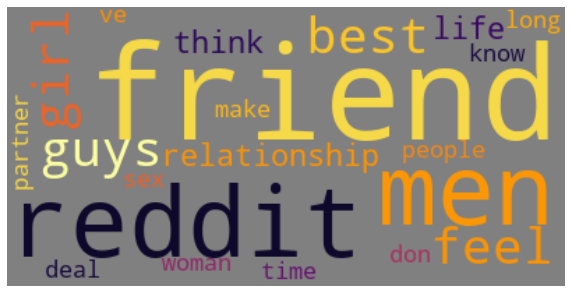

In [4]:
# most frequent words to create a wordcloud
most_freq_words_men = pd.DataFrame(sorted(top_words.items(), key = lambda x: x[1], reverse = True))
text_men = list(most_freq_words_men[0][:25])
text = ' '.join(text_men)

plt.figure(figsize = (10,15))
wordcloud = WordCloud(background_color = 'gray', colormap = 'inferno').generate(text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

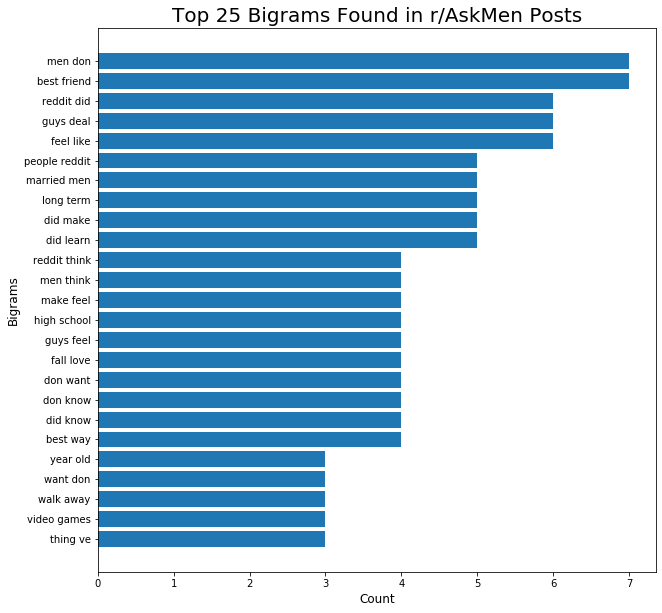

In [5]:
# prepare data to search for most common bigrams 
cvec = CountVectorizer(stop_words = 'english', ngram_range = (2,2))
X = askmen['title']
X = cvec.fit_transform(X)
Xbi_df = pd.DataFrame(X.toarray(),
                    columns = cvec.get_feature_names())

top_bigrams = {}

# loop through columns
for i in Xbi_df.columns:
    # save sum of each column in dictionary
    top_bigrams[i] = Xbi_df[i].sum()
    
# top_bigrams to dataframe sorted by highest occurance
most_freq_bigrams = pd.DataFrame(sorted(top_bigrams.items(), key = lambda x: x[1]))

plt.figure(figsize = (10, 10))

# omitted most common bigram "men reddit"

plt.barh(most_freq_bigrams[0][-26:-1],
        most_freq_bigrams[1][-26:-1])
plt.title('Top 25 Bigrams Found in r/AskMen Posts', fontsize = 20)
plt.xlabel('Count', fontsize = 12)
plt.ylabel('Bigrams', fontsize = 12)
plt.tight_layout;

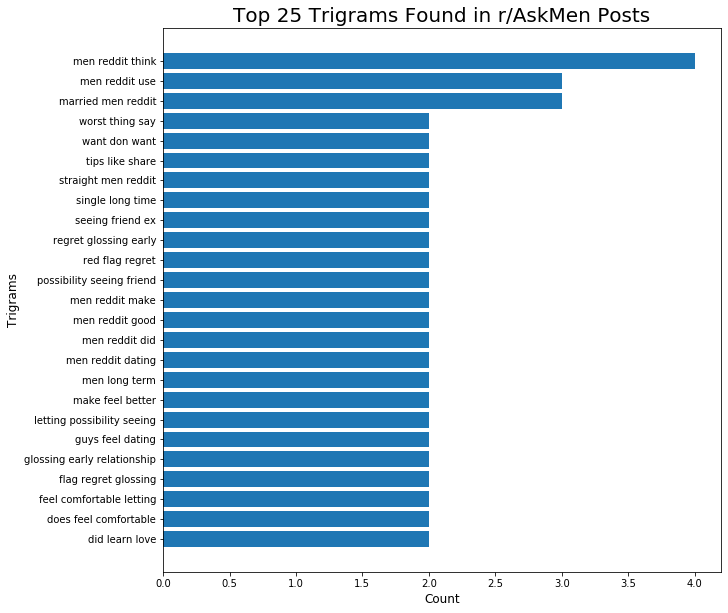

In [6]:
# prepare data to search for most common trigrams
cvec = CountVectorizer(stop_words = 'english', ngram_range = (3,3))
X = askmen['title']
X = cvec.fit_transform(X)
Xtri_df = pd.DataFrame(X.toarray(),
                    columns = cvec.get_feature_names())

top_trigrams = {}

# loop through columns
for i in Xtri_df.columns:
    # save sum of each column in dictionary
    top_trigrams[i] = Xtri_df[i].sum()
    
# top_trigrams to dataframe sorted by highest occurance
most_freq_trigrams = pd.DataFrame(sorted(top_trigrams.items(), key = lambda x: x[1]))

plt.figure(figsize = (10, 10))

plt.barh(most_freq_trigrams[0][-25:],
        most_freq_trigrams[1][-25:])
plt.title('Top 25 Trigrams Found in r/AskMen Posts', fontsize = 20)
plt.xlabel('Count', fontsize = 12)
plt.ylabel('Trigrams', fontsize = 12)
plt.tight_layout;

#### EDA for r/AskWomen

In [7]:
askwomen = pd.read_csv('./data/askwomen.csv')

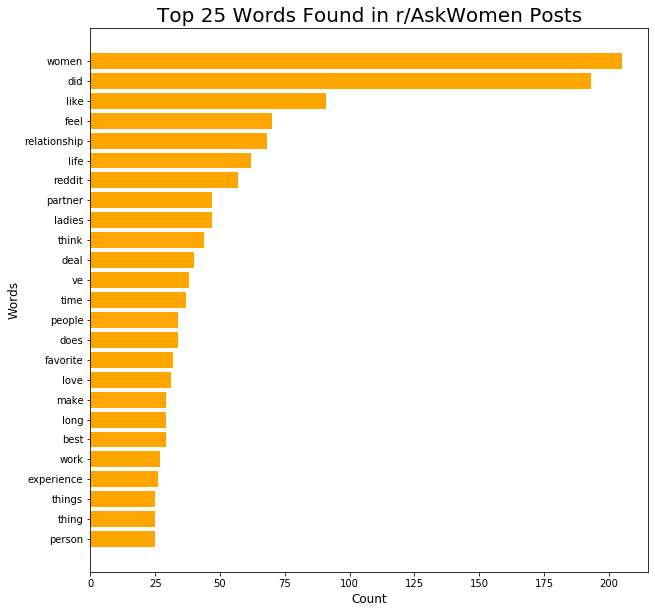

In [8]:
# most frequent words
cvec = CountVectorizer(stop_words = 'english')
X = askwomen['title']
X = cvec.fit_transform(X)
Xcvec_df = pd.DataFrame(X.toarray(),
                    columns = cvec.get_feature_names())

top_words = {}

# loop through columns
for i in Xcvec_df.columns:
    # save sum of each column in dictionary
    top_words[i] = Xcvec_df[i].sum()
    
# top_words to dataframe sorted by highest occurance
most_freq_words_women = pd.DataFrame(sorted(top_words.items(), key = lambda x: x[1]))

plt.figure(figsize = (10, 10))

plt.barh(most_freq_words_women[0][-25:],
        most_freq_words_women[1][-25:],
        color = 'orange')
plt.title('Top 25 Words Found in r/AskWomen Posts', fontsize = 20)
plt.xlabel('Count', fontsize = 12)
plt.ylabel('Words', fontsize = 12)
plt.tight_layout;

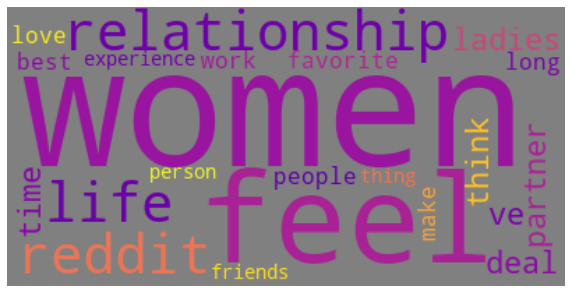

In [9]:
# Wordcloud for top words in r/AskWomen
most_freq_words_women = pd.DataFrame(sorted(top_words.items(), key = lambda x: x[1], reverse = True))
text_women = list(most_freq_words_women[0][:25])
text = ' '.join(text_women)

plt.figure(figsize = (10,15))
wordcloud = WordCloud(background_color = 'grey', colormap = 'plasma').generate(text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

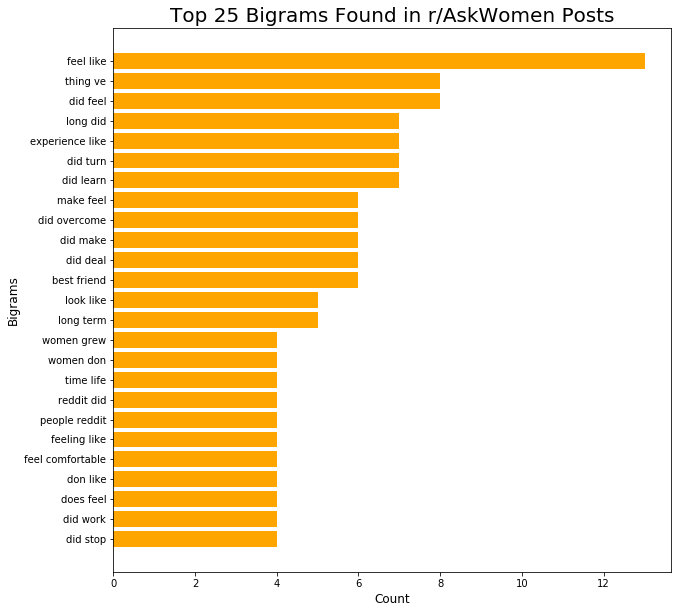

In [10]:
# preparing for bigrams for r/askwomen
cvec = CountVectorizer(stop_words = 'english', ngram_range = (2,2))
X = askwomen['title']
X = cvec.fit_transform(X)
Xbi_df = pd.DataFrame(X.toarray(),
                    columns = cvec.get_feature_names())

top_bigrams = {}

# loop through columns
for i in Xbi_df.columns:
    # save sum of each column in dictionary
    top_bigrams[i] = Xbi_df[i].sum()
    
# top_bigrams to dataframe sorted by highest occurance
most_freq_bigrams = pd.DataFrame(sorted(top_bigrams.items(), key = lambda x: x[1]))

plt.figure(figsize = (10, 10))

# omitted most common bigram "women reddit"


plt.barh(most_freq_bigrams[0][-26:-1],
        most_freq_bigrams[1][-26:-1],
        color = 'orange')
plt.title('Top 25 Bigrams Found in r/AskWomen Posts', fontsize = 20)
plt.xlabel('Count', fontsize = 12)
plt.ylabel('Bigrams', fontsize = 12)
plt.tight_layout;

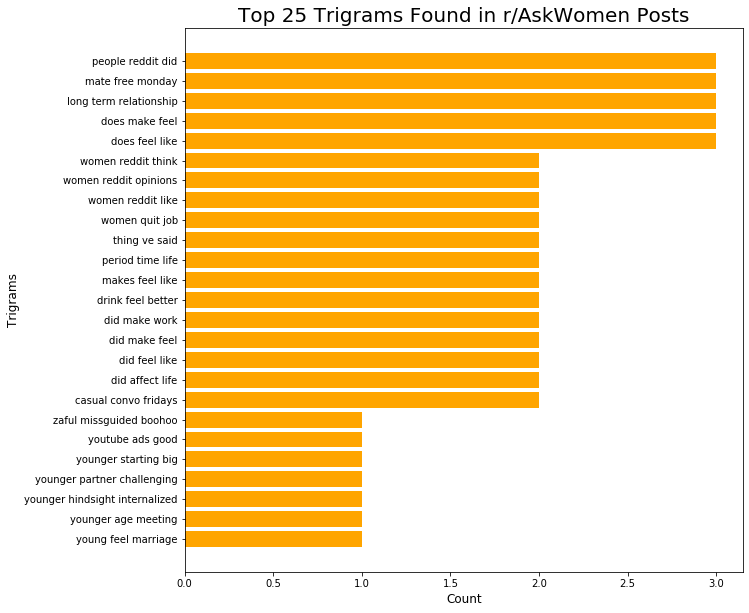

In [11]:
# reparing for trigrams for women
cvec = CountVectorizer(stop_words = 'english', ngram_range = (3,3))
X = askwomen['title']
X = cvec.fit_transform(X)
Xtri_df = pd.DataFrame(X.toarray(),
                    columns = cvec.get_feature_names())

top_trigrams = {}

# loop through columns
for i in Xtri_df.columns:
    # save sum of each column in dictionary
    top_trigrams[i] = Xtri_df[i].sum()
    
# top_trigrams to dataframe sorted by highest occurance
most_freq_trigrams = pd.DataFrame(sorted(top_trigrams.items(), key = lambda x: x[1]))

plt.figure(figsize = (10, 10))

plt.barh(most_freq_trigrams[0][-25:],
        most_freq_trigrams[1][-25:],
        color = 'orange')
plt.title('Top 25 Trigrams Found in r/AskWomen Posts', fontsize = 20)
plt.xlabel('Count', fontsize = 12)
plt.ylabel('Trigrams', fontsize = 12)
plt.tight_layout;

#### EDA for Final Dataframe

In [12]:
# Check for class balance
askmen.shape, askwomen.shape

((983, 7), (980, 7))

> We have very balanced classes: 983 observations for r/AskMen and 980 observations for r/AskWomen

In [13]:
# Read in main dataframe
df = pd.read_csv('./data/AskMen_AskWomen.csv')
df['number of columns'] = df['comms_num']
df.drop(columns = 'comms_num', inplace = True)

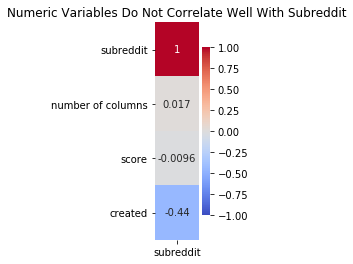

In [14]:
# Create a heatmap for correlations amongst numerical variables with our target
plt.figure(figsize = (1,4))
sns.heatmap(df.corr()[['subreddit']].sort_values('subreddit', ascending = False),
            vmin = -1, 
            vmax = 1,
            annot = True,
            cmap = 'coolwarm')
plt.title('Numeric Variables Do Not Correlate Well With Subreddit');

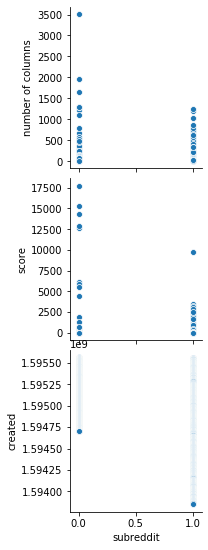

In [15]:
# create pairplot as another way to examine relationships of numeric data with our target
sns.pairplot(df, 
             x_vars=['subreddit'], 
             y_vars= ['number of columns', 'score', 'created']);

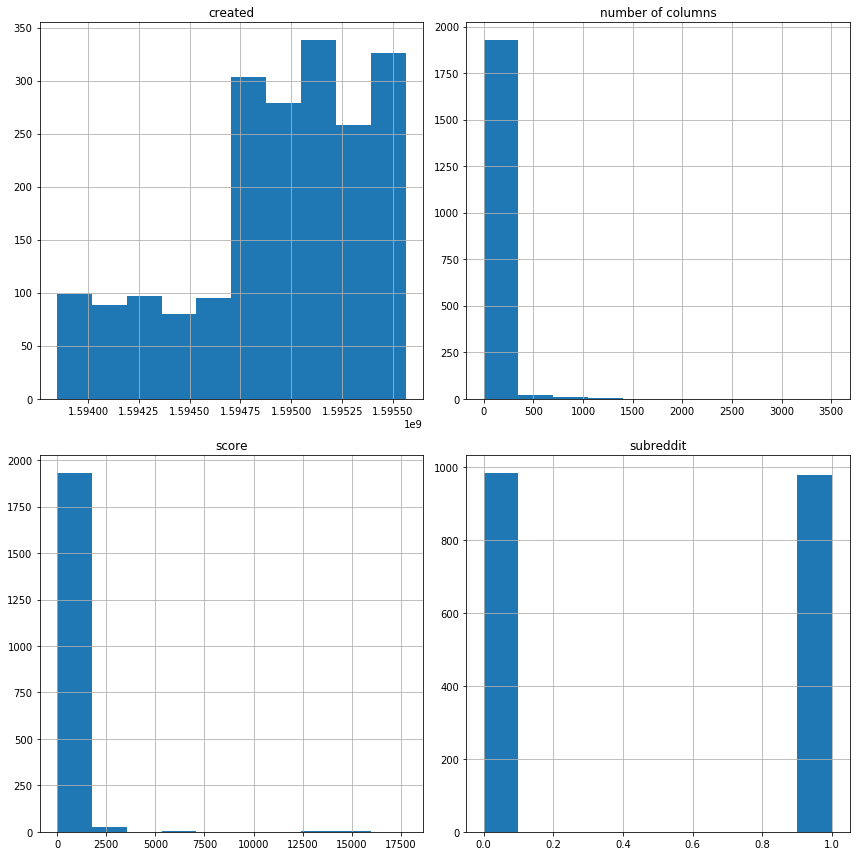

In [16]:
# histograms to examine distribution of numeric data
df._get_numeric_data().hist(figsize = (12,12))
plt.tight_layout();

In [17]:
# split the text to examine which top words the subreddits have in common and which are unique 
# to each subreddit

men_only = []
women_only = []
both = []

for word in text_men:
    if word in text_women:
        both.append(word)
    else:
        men_only.append(word)

for word in text_women:
    if word not in text_men:
        women_only.append(word)

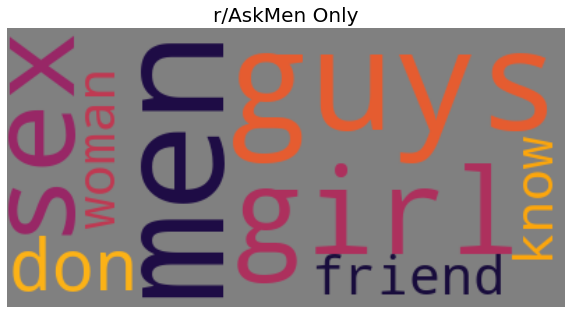

In [18]:
# wordcloud for words unique to r/AskMen
plt.figure(figsize = (10,15))
wordcloud = WordCloud(background_color = 'grey', colormap = 'inferno').generate(', '.join(men_only))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('r/AskMen Only', fontsize = 20)
plt.show()

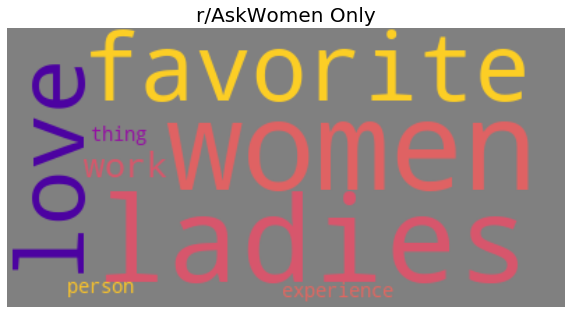

In [19]:
# wordcloud for words unique to r/AskWomen
plt.figure(figsize = (10,15))
wordcloud = WordCloud(background_color = 'grey', colormap = 'plasma').generate(', '.join(women_only))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('r/AskWomen Only', fontsize = 20)
plt.show()

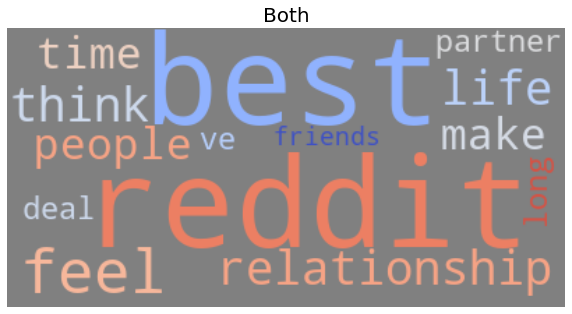

In [20]:
# wordcloud for words the subreddits have in common
plt.figure(figsize = (10,15))
wordcloud = WordCloud(background_color = 'grey', colormap = 'coolwarm').generate(', '.join(both))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Both', fontsize = 20)
plt.show()

# Continue to document 3). Modeling